# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [22]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.3.0


## Creating data to view and fit

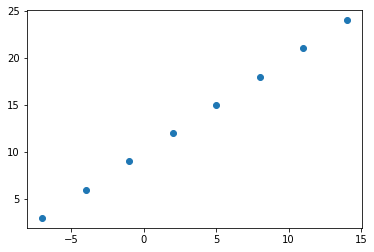

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X, y)

In [24]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [25]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [26]:
X[0], y[0]

(-7.0, 3.0)

In [27]:
X[1], y[1]

(-4.0, 6.0)

In [28]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [29]:
X[0].ndim

0

In [30]:
X[0], y[0]

(-7.0, 3.0)

In [31]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [32]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

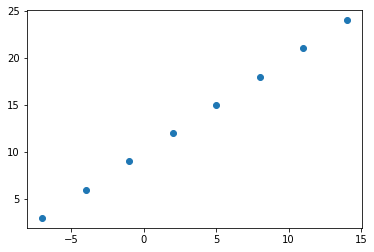

In [33]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [34]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

"""
or: 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
"""

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 501us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 501us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 500us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 500us/step - loss: 10.9748 - mae: 10.9748


In [35]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [36]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [37]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, or change the activation function of each layer
2. **Compiling a model** - here we might change the optimization function  or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for some **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [38]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 501us/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 501us/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 500us/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 500us/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 501us/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 501us/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 500us/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 501us/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [===========================

1/1 [==============================] - 0s 501us/step - loss: 6.9600 - mae: 6.9600
Epoch 88/100
1/1 [==============================] - 0s 499us/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 500us/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 500us/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 500us/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 500us/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 501us/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 500us/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 501us/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 501us/step 

In [39]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [40]:
# Let's see if our model's prediction has improved...
model.predict([17])

array([[29.739855]], dtype=float32)

In [41]:
model = tf.keras.Sequential([ # homework
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.1),
             metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 500us/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 10.1236 - mae: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 499us/step - loss: 9.6736 - mae: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 500us/step - loss: 9.2236 - mae: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 500us/step - loss: 8.7736 - mae: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 501us/step - loss: 8.3236 - mae: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 500us/step - loss: 7.8736 - mae: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 501us/step - loss: 7.4236 - mae: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 500us/step - loss: 6.9736 - mae: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 500us/step - loss: 6.8250 - mae: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 501

1/1 [==============================] - 0s 500us/step - loss: 1.4132 - mae: 1.4132
Epoch 88/100
1/1 [==============================] - 0s 501us/step - loss: 1.3395 - mae: 1.3395
Epoch 89/100
1/1 [==============================] - 0s 501us/step - loss: 1.2657 - mae: 1.2657
Epoch 90/100
1/1 [==============================] - 0s 501us/step - loss: 1.1918 - mae: 1.1918
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 1.1178 - mae: 1.1178
Epoch 92/100
1/1 [==============================] - 0s 501us/step - loss: 1.0437 - mae: 1.0437
Epoch 93/100
1/1 [==============================] - 0s 501us/step - loss: 0.9695 - mae: 0.9695
Epoch 94/100
1/1 [==============================] - 0s 501us/step - loss: 0.8952 - mae: 0.8952
Epoch 95/100
1/1 [==============================] - 0s 501us/step - loss: 0.8208 - mae: 0.8208
Epoch 96/100
1/1 [==============================] - 0s 501us/step - loss: 0.7464 - mae: 0.7464
Epoch 97/100
1/1 [==============================] - 0s 500us/step 

In [42]:
model.predict([17]) # end of homework

array([[27.497076]], dtype=float32)

In [43]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hiden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=["mae"],
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 501us/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 501us/step - loss: 13.5328 - mae: 13.5328
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 500us/step - loss: 12.1611 - mae: 12.1611
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 11.4786 - mae: 11.4786
Epoch 6/100
1/1 [==============================] - 0s 500us/step - loss: 10.7953 - mae: 10.7953
Epoch 7/100
1/1 [==============================] - 0s 500us/step - loss: 10.1084 - mae: 10.1084
Epoch 8/100
1/1 [==============================] - 0s 501us/step - loss: 9.4153 - mae: 9.4153
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 500us/step - loss: 7.9998 - mae: 7.9998
Epoch 11/100
1/1 [==============================] - 0

1/1 [==============================] - 0s 500us/step - loss: 0.3402 - mae: 0.3402
Epoch 88/100
1/1 [==============================] - 0s 0s/step - loss: 0.4551 - mae: 0.4551
Epoch 89/100
1/1 [==============================] - 0s 500us/step - loss: 0.3949 - mae: 0.3949
Epoch 90/100
1/1 [==============================] - 0s 500us/step - loss: 0.2212 - mae: 0.2212
Epoch 91/100
1/1 [==============================] - 0s 500us/step - loss: 0.2634 - mae: 0.2634
Epoch 92/100
1/1 [==============================] - 0s 500us/step - loss: 0.0835 - mae: 0.0835
Epoch 93/100
1/1 [==============================] - 0s 500us/step - loss: 0.2379 - mae: 0.2379
Epoch 94/100
1/1 [==============================] - 0s 500us/step - loss: 0.1928 - mae: 0.1928
Epoch 95/100
1/1 [==============================] - 0s 500us/step - loss: 0.2699 - mae: 0.2699
Epoch 96/100
1/1 [==============================] - 0s 502us/step - loss: 0.3601 - mae: 0.3601
Epoch 97/100
1/1 [==============================] - 0s 500us/step 

In [44]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
# Let's try to make a prediction
model.predict([17.0])

array([[27.138466]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ...

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [46]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [47]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

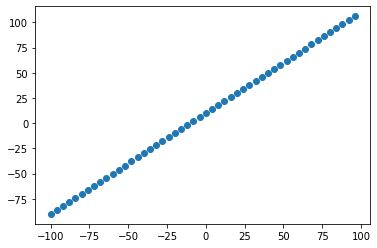

In [48]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...
* **The training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically around 10-15% of the total data available

In [49]:
# Check the length of how many samples we have
len(X)

50

In [50]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize again!

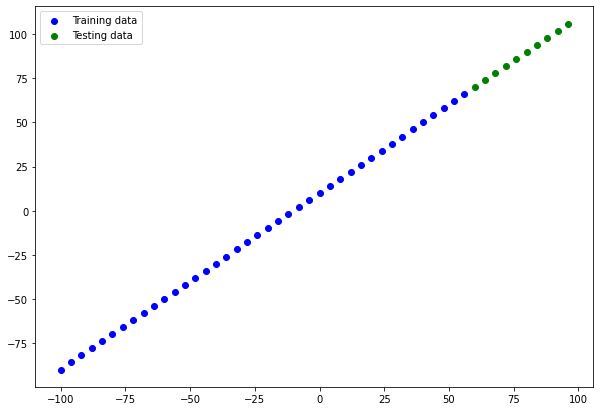

In [51]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data") # want our model to be able to predict this (given X what's y?)
# Show a legend
plt.legend()

In [52]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [53]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [54]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [55]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [57]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [58]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


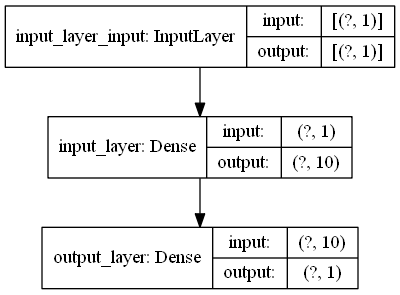

In [59]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model)

In [60]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [61]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [62]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truths labels
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()

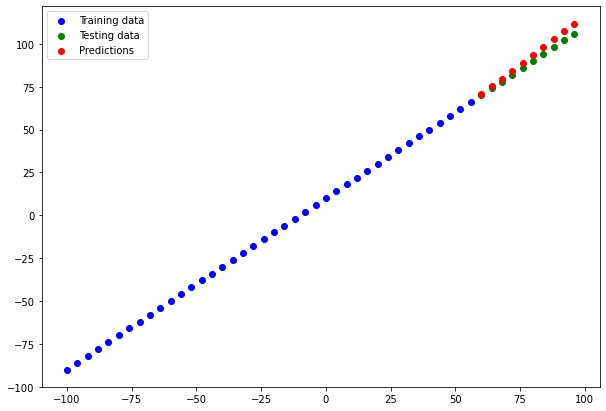

In [63]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [64]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 3.1969 - mae: 3.1969


[3.196941375732422, 3.196941375732422]

In [65]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253971 , 23.84169  ],
      dtype=float32)>

In [66]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [67]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [68]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [69]:
# Calculate the mean absolute error (actually this time)
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [70]:
# Calculate the mean square error
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [71]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))


### Running experiments to improve our model

'''
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ...

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modeling experiments:

1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs

**Build model_1** 

In [72]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 750us/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 501us/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 500us/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 750us/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 500us/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 500us/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 500us/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 500us/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 500us/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 250us/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [=============================

2/2 [==============================] - 0s 500us/step - loss: 9.2433 - mae: 9.2433
Epoch 87/100
2/2 [==============================] - 0s 500us/step - loss: 12.0209 - mae: 12.0209
Epoch 88/100
2/2 [==============================] - 0s 251us/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 500us/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 501us/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 500us/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 751us/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 250us/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 501us/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 501us/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0

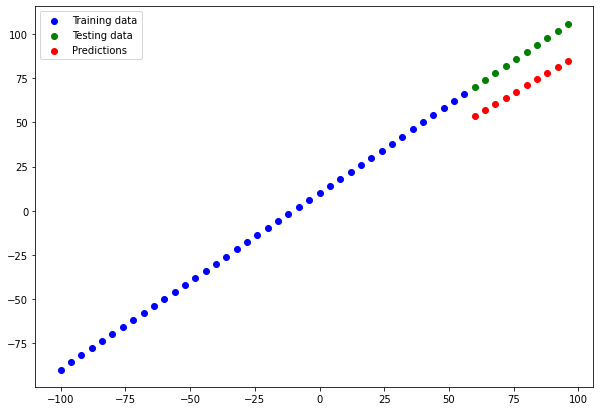

In [73]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [74]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [75]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build 'model_2'**

* 2 dense layers, trained for 100 epochs

In [76]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 750us/step - loss: 73.0019 - mse: 7955.5845
Epoch 2/100
2/2 [==============================] - 0s 501us/step - loss: 17.5325 - mse: 483.7136
Epoch 3/100
2/2 [==============================] - 0s 250us/step - loss: 20.4862 - mse: 612.8414
Epoch 4/100
2/2 [==============================] - 0s 500us/step - loss: 13.1871 - mse: 230.7354
Epoch 5/100
2/2 [==============================] - 0s 250us/step - loss: 14.5492 - mse: 261.8344
Epoch 6/100
2/2 [==============================] - 0s 500us/step - loss: 11.6087 - mse: 155.5869
Epoch 7/100
2/2 [==============================] - 0s 500us/step - loss: 12.6668 - mse: 215.1633
Epoch 8/100
2/2 [==============================] - 0s 501us/step - loss: 11.0468 - mse: 150.9928
Epoch 9/100
2/2 [==============================] - 0s 500us/step - loss: 39.7317 - mse: 2475.0776
Epoch 10/100
2/2 [==============================] - 0s 500us/step - loss: 27.2189 - mse: 1042.4828
Epoch 11/100
2/2 [========

2/2 [==============================] - 0s 500us/step - loss: 7.2769 - mse: 73.4361
Epoch 85/100
2/2 [==============================] - 0s 501us/step - loss: 14.9605 - mse: 312.6097
Epoch 86/100
2/2 [==============================] - 0s 250us/step - loss: 15.2848 - mse: 315.4443
Epoch 87/100
2/2 [==============================] - 0s 250us/step - loss: 19.0979 - mse: 520.7352
Epoch 88/100
2/2 [==============================] - 0s 250us/step - loss: 29.8574 - mse: 1290.3834
Epoch 89/100
2/2 [==============================] - 0s 250us/step - loss: 10.1967 - mse: 124.4853
Epoch 90/100
2/2 [==============================] - 0s 250us/step - loss: 21.5458 - mse: 665.3117
Epoch 91/100
2/2 [==============================] - 0s 250us/step - loss: 10.5927 - mse: 162.0392
Epoch 92/100
2/2 [==============================] - 0s 250us/step - loss: 18.4135 - mse: 464.9257
Epoch 93/100
2/2 [==============================] - 0s 501us/step - loss: 7.4299 - mse: 82.2258
Epoch 94/100
2/2 [==================

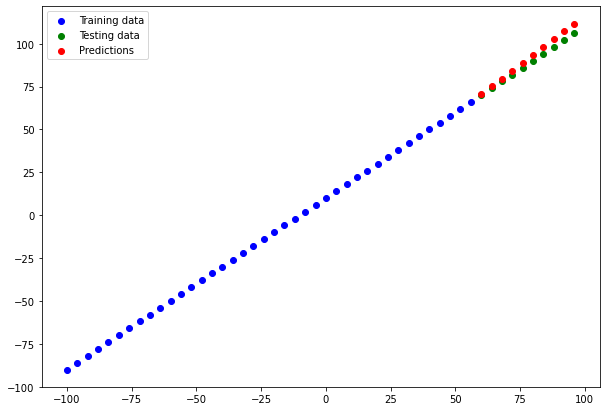

In [77]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [78]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1110053>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.497129>)

**Build model_3**

* 2 layers, trained for 500 epochs

In [79]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 751us/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 251us/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 250us/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 250us/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 501us/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 250us/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 251us/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [=====================

2/2 [==============================] - 0s 251us/step - loss: 14.9650 - mae: 14.9650
Epoch 86/500
2/2 [==============================] - 0s 250us/step - loss: 15.2862 - mae: 15.2862
Epoch 87/500
2/2 [==============================] - 0s 501us/step - loss: 19.1086 - mae: 19.1086
Epoch 88/500
2/2 [==============================] - 0s 501us/step - loss: 29.8228 - mae: 29.8228
Epoch 89/500
2/2 [==============================] - 0s 250us/step - loss: 10.1742 - mae: 10.1742
Epoch 90/500
2/2 [==============================] - 0s 250us/step - loss: 21.5240 - mae: 21.5240
Epoch 91/500
2/2 [==============================] - 0s 500us/step - loss: 10.5716 - mae: 10.5716
Epoch 92/500
2/2 [==============================] - 0s 500us/step - loss: 18.3977 - mae: 18.3977
Epoch 93/500
2/2 [==============================] - 0s 250us/step - loss: 7.4138 - mae: 7.4138
Epoch 94/500
2/2 [==============================] - 0s 500us/step - loss: 17.7380 - mae: 17.7380
Epoch 95/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 22.5631 - mae: 22.5631
Epoch 170/500
2/2 [==============================] - 0s 501us/step - loss: 10.1499 - mae: 10.1499
Epoch 171/500
2/2 [==============================] - 0s 250us/step - loss: 18.0464 - mae: 18.0464
Epoch 172/500
2/2 [==============================] - 0s 500us/step - loss: 28.8377 - mae: 28.8377
Epoch 173/500
2/2 [==============================] - 0s 500us/step - loss: 16.5280 - mae: 16.5280
Epoch 174/500
2/2 [==============================] - 0s 501us/step - loss: 11.2115 - mae: 11.2115
Epoch 175/500
2/2 [==============================] - 0s 251us/step - loss: 27.5839 - mae: 27.5839
Epoch 176/500
2/2 [==============================] - 0s 250us/step - loss: 8.2680 - mae: 8.2680
Epoch 177/500
2/2 [==============================] - 0s 500us/step - loss: 9.2580 - mae: 9.2580
Epoch 178/500
2/2 [==============================] - 0s 500us/step - loss: 18.1440 - mae: 18.1440
Epoch 179/500
2/2 [===================

2/2 [==============================] - 0s 500us/step - loss: 21.8205 - mae: 21.8205
Epoch 254/500
2/2 [==============================] - 0s 250us/step - loss: 7.2792 - mae: 7.2792
Epoch 255/500
2/2 [==============================] - 0s 500us/step - loss: 24.7126 - mae: 24.7126
Epoch 256/500
2/2 [==============================] - 0s 500us/step - loss: 12.4220 - mae: 12.4220
Epoch 257/500
2/2 [==============================] - 0s 250us/step - loss: 10.5823 - mae: 10.5823
Epoch 258/500
2/2 [==============================] - 0s 501us/step - loss: 14.4883 - mae: 14.4883
Epoch 259/500
2/2 [==============================] - 0s 501us/step - loss: 8.6132 - mae: 8.6132
Epoch 260/500
2/2 [==============================] - 0s 500us/step - loss: 43.0580 - mae: 43.0580
Epoch 261/500
2/2 [==============================] - 0s 250us/step - loss: 18.4611 - mae: 18.4611
Epoch 262/500
2/2 [==============================] - 0s 500us/step - loss: 6.8820 - mae: 6.8820
Epoch 263/500
2/2 [=====================

2/2 [==============================] - 0s 250us/step - loss: 10.4477 - mae: 10.4477
Epoch 338/500
2/2 [==============================] - 0s 500us/step - loss: 19.6832 - mae: 19.6832
Epoch 339/500
2/2 [==============================] - 0s 751us/step - loss: 35.0762 - mae: 35.0762
Epoch 340/500
2/2 [==============================] - 0s 500us/step - loss: 10.4192 - mae: 10.4192
Epoch 341/500
2/2 [==============================] - 0s 500us/step - loss: 9.7625 - mae: 9.7625
Epoch 342/500
2/2 [==============================] - 0s 500us/step - loss: 11.9500 - mae: 11.9500
Epoch 343/500
2/2 [==============================] - 0s 501us/step - loss: 9.3943 - mae: 9.3943
Epoch 344/500
2/2 [==============================] - 0s 500us/step - loss: 5.6071 - mae: 5.6071
Epoch 345/500
2/2 [==============================] - 0s 249us/step - loss: 37.4876 - mae: 37.4876
Epoch 346/500
2/2 [==============================] - 0s 250us/step - loss: 16.8830 - mae: 16.8830
Epoch 347/500
2/2 [=====================

2/2 [==============================] - 0s 501us/step - loss: 17.3753 - mae: 17.3753
Epoch 422/500
2/2 [==============================] - 0s 500us/step - loss: 7.8241 - mae: 7.8241
Epoch 423/500
2/2 [==============================] - 0s 500us/step - loss: 25.3789 - mae: 25.3789
Epoch 424/500
2/2 [==============================] - 0s 500us/step - loss: 15.1031 - mae: 15.1031
Epoch 425/500
2/2 [==============================] - 0s 250us/step - loss: 7.1643 - mae: 7.1643
Epoch 426/500
2/2 [==============================] - 0s 501us/step - loss: 20.3318 - mae: 20.3318
Epoch 427/500
2/2 [==============================] - 0s 250us/step - loss: 6.3283 - mae: 6.3283
Epoch 428/500
2/2 [==============================] - 0s 500us/step - loss: 12.9962 - mae: 12.9962
Epoch 429/500
2/2 [==============================] - 0s 500us/step - loss: 10.7869 - mae: 10.7869
Epoch 430/500
2/2 [==============================] - 0s 501us/step - loss: 11.4007 - mae: 11.4007
Epoch 431/500
2/2 [=====================

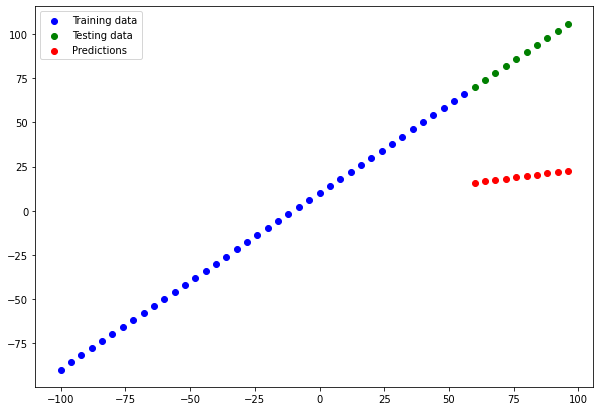

In [80]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [81]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments now; let's compare the results.

In [82]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2",mae_2.numpy(),mse_2.numpy()],
                ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.111005,12.497129
2,model_3,68.713615,4808.027344


It looks like model_2 performed the best...

In [83]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


>🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, you will get closer to figuring out what does work. Remember, the machine learning practioner's motto: "experiment, experiment, experiment."

## Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modeling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving models allows us to use them outside of Jupyter Notebook (or wherever they were trained) such as in a web application or an app.

There are two main formats we can save our models to:

1. The SavedModel format
2. The HDF5 format

In [84]:
# Save model using the SavedModel format 
model_2.save("best_model_SavedModel_format")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [85]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [86]:
# Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [88]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Check to see if loaded .h5 model predictions math model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [91]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download."
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [92]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

ModuleNotFoundError: No module named 'google.colab'

In [93]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/FOLDER_NAME

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [94]:
!ls /content/drive/MyDrive/FOLDER_NAME

'ls' is not recognized as an internal or external command,
operable program or batch file.


## A larger example

In [95]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# Read in the insurancec dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [97]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [98]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [99]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [100]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [101]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [102]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [103]:
0.2*1338

267.6

In [104]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [129]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 353us/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 324us/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 353us/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 353us/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 338us/step - loss: 7748.3892 - mae: 7748.389

34/34 [==============================] - 0s 324us/step - loss: 7283.4888 - mae: 7283.4888
Epoch 74/100
34/34 [==============================] - 0s 353us/step - loss: 7335.5063 - mae: 7335.5063
Epoch 75/100
34/34 [==============================] - 0s 353us/step - loss: 7275.6392 - mae: 7275.6392
Epoch 76/100
34/34 [==============================] - 0s 324us/step - loss: 7313.1855 - mae: 7313.1855
Epoch 77/100
34/34 [==============================] - 0s 339us/step - loss: 7485.7578 - mae: 7485.7578
Epoch 78/100
34/34 [==============================] - 0s 353us/step - loss: 7352.2798 - mae: 7352.2798
Epoch 79/100
34/34 [==============================] - 0s 339us/step - loss: 7520.5703 - mae: 7520.5703
Epoch 80/100
34/34 [==============================] - 0s 339us/step - loss: 7279.3779 - mae: 7279.3779
Epoch 81/100
34/34 [==============================] - 0s 353us/step - loss: 7273.8477 - mae: 7273.8477
Epoch 82/100
34/34 [==============================] - 0s 353us/step - loss: 7176.5210 

In [110]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 389us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [113]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try to) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for train for longer (200 epochs)
3. (insert your own experiment here)

In [141]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 442us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 412us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 397us/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 397us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 427us/step - loss: 10905.8154 - mae:

34/34 [==============================] - 0s 442us/step - loss: 6073.7422 - mae: 6073.7422
Epoch 73/100
34/34 [==============================] - 0s 427us/step - loss: 6059.4873 - mae: 6059.4873
Epoch 74/100
34/34 [==============================] - 0s 442us/step - loss: 6031.3848 - mae: 6031.3848
Epoch 75/100
34/34 [==============================] - 0s 427us/step - loss: 6010.3350 - mae: 6010.3350
Epoch 76/100
34/34 [==============================] - 0s 412us/step - loss: 5995.2168 - mae: 5995.2168
Epoch 77/100
34/34 [==============================] - 0s 412us/step - loss: 5963.0718 - mae: 5963.0718
Epoch 78/100
34/34 [==============================] - 0s 427us/step - loss: 5940.0610 - mae: 5940.0610
Epoch 79/100
34/34 [==============================] - 0s 412us/step - loss: 5915.1064 - mae: 5915.1064
Epoch 80/100
34/34 [==============================] - 0s 427us/step - loss: 5887.9990 - mae: 5887.9990
Epoch 81/100
34/34 [==============================] - 0s 427us/step - loss: 5861.6987 

In [142]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 389us/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [143]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 445us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [150]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 427us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 427us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 648us/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 500us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 427us/step - loss: 10905.8154 - mae:

34/34 [==============================] - 0s 427us/step - loss: 6059.4873 - mae: 6059.4873
Epoch 74/200
34/34 [==============================] - 0s 442us/step - loss: 6031.3848 - mae: 6031.3848
Epoch 75/200
34/34 [==============================] - 0s 442us/step - loss: 6010.3350 - mae: 6010.3350
Epoch 76/200
34/34 [==============================] - 0s 427us/step - loss: 5995.2168 - mae: 5995.2168
Epoch 77/200
34/34 [==============================] - 0s 412us/step - loss: 5963.0718 - mae: 5963.0718
Epoch 78/200
34/34 [==============================] - 0s 412us/step - loss: 5940.0610 - mae: 5940.0610
Epoch 79/200
34/34 [==============================] - 0s 397us/step - loss: 5915.1064 - mae: 5915.1064
Epoch 80/200
34/34 [==============================] - 0s 397us/step - loss: 5887.9990 - mae: 5887.9990
Epoch 81/200
34/34 [==============================] - 0s 412us/step - loss: 5861.6987 - mae: 5861.6987
Epoch 82/200
34/34 [==============================] - 0s 412us/step - loss: 5834.3076 

34/34 [==============================] - 0s 412us/step - loss: 3742.4954 - mae: 3742.4954
Epoch 153/200
34/34 [==============================] - 0s 412us/step - loss: 3744.4399 - mae: 3744.4399
Epoch 154/200
34/34 [==============================] - 0s 397us/step - loss: 3737.1826 - mae: 3737.1826
Epoch 155/200
34/34 [==============================] - 0s 397us/step - loss: 3737.6541 - mae: 3737.6541
Epoch 156/200
34/34 [==============================] - 0s 412us/step - loss: 3737.1667 - mae: 3737.1667
Epoch 157/200
34/34 [==============================] - 0s 397us/step - loss: 3733.1101 - mae: 3733.1101
Epoch 158/200
34/34 [==============================] - 0s 397us/step - loss: 3729.5808 - mae: 3729.5808
Epoch 159/200
34/34 [==============================] - 0s 412us/step - loss: 3725.9050 - mae: 3725.9050
Epoch 160/200
34/34 [==============================] - 0s 412us/step - loss: 3733.2822 - mae: 3733.2822
Epoch 161/200
34/34 [==============================] - 0s 397us/step - loss: 3

In [146]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 389us/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [147]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 389us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

Text(0.5, 0, 'epochs')

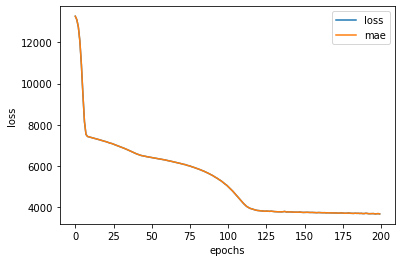

In [148]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback] (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [160]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [161]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [164]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [166]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's buildl a neural network model and see how it goes.

In [169]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 427us/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 442us/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 427us/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 412us/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 412us/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 412us/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 412us/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 412us/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 427us/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 411us/s

34/34 [==============================] - 0s 427us/step - loss: 3682.8350 - mae: 3682.8350
Epoch 81/100
34/34 [==============================] - 0s 442us/step - loss: 3676.9766 - mae: 3676.9766
Epoch 82/100
34/34 [==============================] - 0s 442us/step - loss: 3673.9495 - mae: 3673.9495
Epoch 83/100
34/34 [==============================] - 0s 412us/step - loss: 3667.8452 - mae: 3667.8452
Epoch 84/100
34/34 [==============================] - 0s 412us/step - loss: 3664.5757 - mae: 3664.5757
Epoch 85/100
34/34 [==============================] - 0s 427us/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/100
34/34 [==============================] - 0s 427us/step - loss: 3660.3047 - mae: 3660.3047
Epoch 87/100
34/34 [==============================] - 0s 412us/step - loss: 3657.5134 - mae: 3657.5134
Epoch 88/100
34/34 [==============================] - 0s 427us/step - loss: 3655.2200 - mae: 3655.2200
Epoch 89/100
34/34 [==============================] - 0s 427us/step - loss: 3653.8831 

In [171]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 389us/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 389us/step - loss: 4924.3477 - mae: 4924.3477

<AxesSubplot:ylabel='Frequency'>

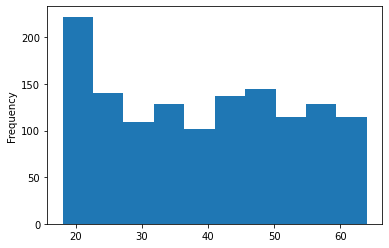

In [155]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

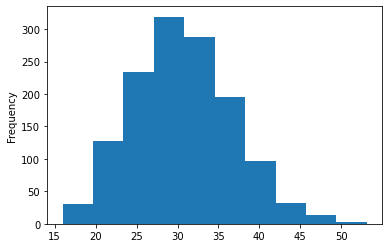

In [156]:
X["bmi"].plot(kind="hist")

In [157]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64